In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install pandas

  Using cached numpy-2.3.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.1 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/11.0 MB 983.6 kB/s eta 0:00:11
   -- ------------------------------------- 0.8/11.0 MB 983.6 kB/s eta 0:00:11
   -- ------------------------------------- 0.8/11.0 MB 983.6 kB/s eta 0:00:11
   --- ------------------------------------ 1.0/11.0 MB 771.0 kB/s eta 0:00:13
   ---- ----------------------------------- 1.3/11.0 MB 781.6 kB/s eta 0:00:13
   ----- ---------------------------------- 1.6/11.0 MB 826.7 kB/s eta 0:00:12
   ----- ---------------------------------- 1.6/11.0 MB 826.7 kB/s eta 0:00:12
   ------ --------------------------------- 1.8/11.0 MB 854.2 kB/s eta 0:00:11
   ------- 

In [11]:
!pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]



In [19]:
caminho_arquivo = r'C:\Users\LUANA\Documents\Data Science\Arquivos\xlsx\mobile_app_user_dataset_1.xlsx'  # adicione extensão se necessário
coluna_desejada = 'Q10_1'

df = pd.read_excel(caminho_arquivo)
print(df)

                                   ID            StartDate  \
0      Unique ID for each participant            StartDate   
1                                   1  2012-09-26 07:46:07   
2                                   2  2012-09-26 07:45:19   
3                                   3  2012-09-26 07:45:35   
4                                   4  2012-09-26 16:58:29   
...                               ...                  ...   
10204                           10204  2012-11-16 23:50:23   
10205                           10205  2012-11-13 07:11:27   
10206                           10206  2012-11-13 00:27:52   
10207                           10207  2012-11-23 08:00:32   
10208                           10208  2012-11-23 15:22:42   

                   EndDate                                    Response Status  \
0                  EndDate  0=incomplete response, 1=complete response, 2=...   
1      2012-09-26 07:46:21                                                  2   
2      2012-

C:\Users\LUANA\anaconda3\envs\DataScience\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


A Tabela contém os dados sobre o uso de apps em diversos países

In [20]:
#Nome e contagem das colunas
print(df.columns)

Index(['ID', 'StartDate', 'EndDate', 'Response Status', 'Participant Type',
       'Q1_1_TEXT', 'Q1_2_TEXT', 'Q1_3_TEXT', 'Q1_4_TEXT', 'Q1_5_TEXT',
       ...
       'Q30_1', 'Q30_2', 'Q30_3', 'Q30_4', 'Q30_5', 'Q30_6', 'Q30_7', 'Q30_8',
       'Q30_9', 'Q30_10'],
      dtype='object', length=161)


In [9]:
'''
#Usando as respostas da pergunta "Why do you download an app?"

- interact with friends and/or family. (1)
- interact with people I don't know. (2)
- To help me carry out a task. (3)
- It is featured in the app store. (4)
- It is on the top downloads chart. (5)
- It is advertised in the apps that I am using. (6)
- For entertainment. (7)
- Out of curiosity. (8)
- An impulsive purchase. (9)
- It features brands or celebrities that I like (e.g., Coca-Cola, Michael Jackson). (10)
- It was mentioned in the media (e.g., TV, newspaper, radio, blogs). (11)
- It is an extension of the website that I use (e.g., Facebook app). (12)
- It is recommended by friends and/or family. (13)
- For someone else (e.g., children, partner). (14)
- Other (please specify) (15) ____________________
'''

print(df['Q10_1'])

0        Why do you download an app? (please select all...
1                                                      NaN
2                                                        1
3                                                        1
4                                                      NaN
                               ...                        
10204                                                  NaN
10205                                                  NaN
10206                                                  NaN
10207                                                  NaN
10208                                                  NaN
Name: Q10_1, Length: 10209, dtype: object


In [19]:
df['Q10_1'] = df['Q10_1'].fillna(0)
print(df)

                                                   Q10_1
0      Why do you download an app? (please select all...
1                                                      0
2                                                      1
3                                                      1
4                                                      0
...                                                  ...
10204                                                  0
10205                                                  0
10206                                                  0
10207                                                  0
10208                                                  0

[10209 rows x 1 columns]


In [11]:
# Conta quantos valores são 1
total_1 = (df['Q10_1'] == 1).sum()

# Calcula a porcentagem
porcentagem_1 = (total_1 / 10209) * 100

print(f'Porcentagem de células com valor 1 (participantes que responderam sim para a opção 1): {porcentagem_1:.2f}%')

Porcentagem de células com valor 1 (participantes que responderam sim para a opção 1): 15.24%


In [14]:
df.shape

(10209, 161)

In [13]:
total_linhas = len(df)
print(total_linhas)
#contando apenas as linhas de dados válidas, excluindo o cabeçalho (nome da coluna)

10209


In [21]:
# Lista com as colunas Q10_1 até Q10_15 (f cria strings formatadas)
colunas_q10 = [f'Q10_{i}' for i in range(1, 16)]

# Dicionário para armazenar as porcentagens
porcentagens = {}

for coluna in colunas_q10:
    # Substitui NaN por 0 para evitar erros na contagem
    df[coluna] = df[coluna].fillna(0)
    # Conta quantos valores são iguais a 1 (resposta positiva)
    total_1 = (df[coluna] == 1).sum()
    # Calcula porcentagem
    porcentagem_1 = (total_1 / total_linhas) * 100
    # Armazena no dicionário
    porcentagens[coluna] = porcentagem_1

# Exibe os resultados
for coluna, perc in porcentagens.items():
    print(f'Porcentagem de células com valor 1 na {coluna} é: {perc:.2f}%')

Porcentagem de células com valor 1 na Q10_1 é: 15.24%
Porcentagem de células com valor 1 na Q10_2 é: 4.47%
Porcentagem de células com valor 1 na Q10_3 é: 26.46%
Porcentagem de células com valor 1 na Q10_4 é: 9.72%
Porcentagem de células com valor 1 na Q10_5 é: 8.62%
Porcentagem de células com valor 1 na Q10_6 é: 5.28%
Porcentagem de células com valor 1 na Q10_7 é: 29.91%
Porcentagem de células com valor 1 na Q10_8 é: 18.31%
Porcentagem de células com valor 1 na Q10_9 é: 4.06%
Porcentagem de células com valor 1 na Q10_10 é: 4.12%
Porcentagem de células com valor 1 na Q10_11 é: 10.55%
Porcentagem de células com valor 1 na Q10_12 é: 14.61%
Porcentagem de células com valor 1 na Q10_13 é: 18.81%
Porcentagem de células com valor 1 na Q10_14 é: 6.44%
Porcentagem de células com valor 1 na Q10_15 é: 4.41%


In [22]:
print(porcentagens)

{'Q10_1': np.float64(15.241453619355472), 'Q10_2': np.float64(4.466647076109315), 'Q10_3': np.float64(26.457047703007152), 'Q10_4': np.float64(9.716916446272897), 'Q10_5': np.float64(8.619845234596925), 'Q10_6': np.float64(5.279655206190617), 'Q10_7': np.float64(29.914781075521596), 'Q10_8': np.float64(18.307375844842785), 'Q10_9': np.float64(4.055245371730826), 'Q10_10': np.float64(4.123812322460574), 'Q10_11': np.float64(10.549515133705555), 'Q10_12': np.float64(14.614555784112056), 'Q10_13': np.float64(18.80693505730238), 'Q10_14': np.float64(6.4354980899206575), 'Q10_15': np.float64(4.407875404055246)}


In [24]:
# Mapeia os nomes originais relacionando com os novos nomes (motivos/descritivos)
mapeamento_nomes = {
    'Q10_1': 'Interagir com amigos e/ou família',
    'Q10_2': 'Interagir com pessoas que não conheço',
    'Q10_3': 'Ajudar a realizar uma tarefa',
    'Q10_4': 'Em destaque na loja de aplicativos',
    'Q10_5': 'Na lista dos mais baixados',
    'Q10_6': 'Anunciado em apps que uso',
    'Q10_7': 'Para entretenimento',
    'Q10_8': 'Por curiosidade',
    'Q10_9': 'Compra impulsiva',
    'Q10_10': 'Apresenta marcas ou celebridades que gosto',
    'Q10_11': 'Mencionado na mídia',
    'Q10_12': 'Extensão de site que uso',
    'Q10_13': 'Recomendado por amigos e/ou família',
    'Q10_14': 'Para outra pessoa',
    'Q10_15': 'Outro'
}

'''
# { ... }: Isso indica que estamos criando um dicionário (Se fosse [ ... ] seria uma lista, e ( ... ) seria uma tupla ou um gerador)

# porcentagens.items(): O método .items() de um dicionário retorna uma sequência de pares (chave, valor) do dicionário.(Nesse caso vai retornar algo como:
[('Q10_1', 15.24), ('Q10_2', 4.56), ('Q10_7', 20.00), ...].

# for col_original, porcentagem in ...: A cada iteração do loop, a variável col_original vai receber a chave (ex: 'Q10_1', 'Q10_2') 
e a variável porcentagem vai receber o valor correspondente (ex: 15.24, 4.56).

# if col_original in mapeamento_nomes:
condição (filtro). Significa que o par (chave:valor) só será incluído no novo dicionário nova_tabela_dados se a col_original(como 'Q10_1') existir
como uma chave no dicionário mapeamento_nomes.
Para garantir que você só tente incluir porcentagens para as colunas mapeadas. Este if evitaria um erro (KeyError) ao tentar acessar mapeamento_nomes['Q10_99'].

# mapeamento_nomes[col_original]: porcentagem:
Esta é a parte que define o par chave:valor para o novo dicionário nova_tabela_dados.
mapeamento_nomes[col_original]: Aqui, você está usando a col_original (que é a chave do dicionário porcentagens, como 'Q10_1') 
para procurar o valor correspondente no dicionário mapeamento_nomes.
Exemplo: Se col_original for 'Q10_1', então mapeamento_nomes['Q10_1'] resultará em 'Interagir com amigos e/ou família'. Este será o novo nome da chave.
: porcentagem: O valor associado a essa nova chave será a porcentagem que você obteve do dicionário porcentagens.
'''

nova_tabela_descritiva = {
    mapeamento_nomes[col_original]: porcentagem
    for col_original, porcentagem in porcentagens.items()
    if col_original in mapeamento_nomes
}

'''
# DataFrame(): É a classe principal do Pandas usada para criar um DataFrame. Um df é como uma planilha ou uma tabela de db, com linhas e colunas.

# list(nova_tabela_descritiva.items())
nova_tabela_descritiva: dicionário que criado na etapa anterior usando a compreensão de dicionário. 
Tem os nomes descritivos em português como chaves e as porcentagens como valores:
{'Interagir com amigos e/ou família': 15.24, 'Para entretenimento': 20.00, ...}
.items(): método de dicionário que retorna uma "visão" dos pares (chave, valor) do dicionário.

nova_tabela_dados.items() resultaria em algo como dict_items([('Interagir com amigos e/ou família', 15.24), ('Para entretenimento', 20.00), ...]).

list(...): A função list() converte essa "visão" dos itens do dicionário em uma lista de tuplas. Cada tupla dentro dessa lista representa uma linha 
potencial na sua futura tabela, onde o primeiro elemento da tupla é o motivo e o segundo é a porcentagem.


#columns=['Motivo de Download', 'Porcentagem (%)']
Este é um argumento opcional (mas muito útil neste caso) da função pd.DataFrame().permite que especificar os nomes das colunas do novo DataFrame.
(Ao fornecer uma lista de tuplas para o DataFrame(), ele interpreta o 1º elemento de cada tupla como a 1ª coluna, o 2º elemento como a 2ª coluna...
'''

df_porcentagens = pd.DataFrame(list(nova_tabela_descritiva.items()), columns=['Motivo de Download', 'Porcentagem (%)'])

'''
Opcional: Definir o 'Motivo de Download' como índice. Melhor organização, acesso e apresentação, 
especialmente útil quando você tem uma coluna que serve como um identificador natural ou uma categoria principal para suas linhas
'''

df_porcentagens = df_porcentagens.set_index('Motivo de Download')

# Exibir a nova tabela
print("\nNova Tabela com os Motivos e suas Porcentagens:")
print(df_porcentagens)


Nova Tabela com os Motivos e suas Porcentagens:
                                            Porcentagem (%)
Motivo de Download                                         
Interagir com amigos e/ou família                 15.241454
Interagir com pessoas que não conheço              4.466647
Ajudar a realizar uma tarefa                      26.457048
Em destaque na loja de aplicativos                 9.716916
Na lista dos mais baixados                         8.619845
Anunciado em apps que uso                          5.279655
Para entretenimento                               29.914781
Por curiosidade                                   18.307376
Compra impulsiva                                   4.055245
Apresenta marcas ou celebridades que gosto         4.123812
Mencionado na mídia                               10.549515
Extensão de site que uso                          14.614556
Recomendado por amigos e/ou família               18.806935
Para outra pessoa                                  

In [27]:
df_ordenada = df_porcentagens.sort_values("Porcentagem (%)", ascending=False)
print(df_ordenada)

                                            Porcentagem (%)
Motivo de Download                                         
Para entretenimento                               29.914781
Ajudar a realizar uma tarefa                      26.457048
Recomendado por amigos e/ou família               18.806935
Por curiosidade                                   18.307376
Interagir com amigos e/ou família                 15.241454
Extensão de site que uso                          14.614556
Mencionado na mídia                               10.549515
Em destaque na loja de aplicativos                 9.716916
Na lista dos mais baixados                         8.619845
Para outra pessoa                                  6.435498
Anunciado em apps que uso                          5.279655
Interagir com pessoas que não conheço              4.466647
Outro                                              4.407875
Apresenta marcas ou celebridades que gosto         4.123812
Compra impulsiva                        

In [31]:
df_porcentagens.describe()

,Porcentagem (%)
count,15.000000
mean,12.066477
std,8.314159
min,4.055245
25%,4.873151
50%,9.716916
75%,16.774415
max,29.914781


In [35]:
# Estatísticas gerais com NumPy
# Extraia APENAS OS VALORES do dicionário 'porcentagens' e converta para uma lista ou um array NumPy
valores = list(porcentagens.values())
# Ou diretamente para um array NumPy: valores = np.array(list(porcentagens.values()))

# Agora as operações NumPy
print("### Estatísticas gerais com NumPy ###")
print(f"Porcentagem média: {np.mean(valores):.2f}")
print(f"Desvio padrão: {np.std(valores):.2f}")
print(f"Maior porcentagem: {np.max(valores)}")
print(f"Menor porcentagem: {np.min(valores)}")

### Estatísticas gerais com NumPy ###
Porcentagem média: 12.07
Desvio padrão: 8.03
Maior porcentagem: 29.914781075521596
Menor porcentagem: 4.055245371730826


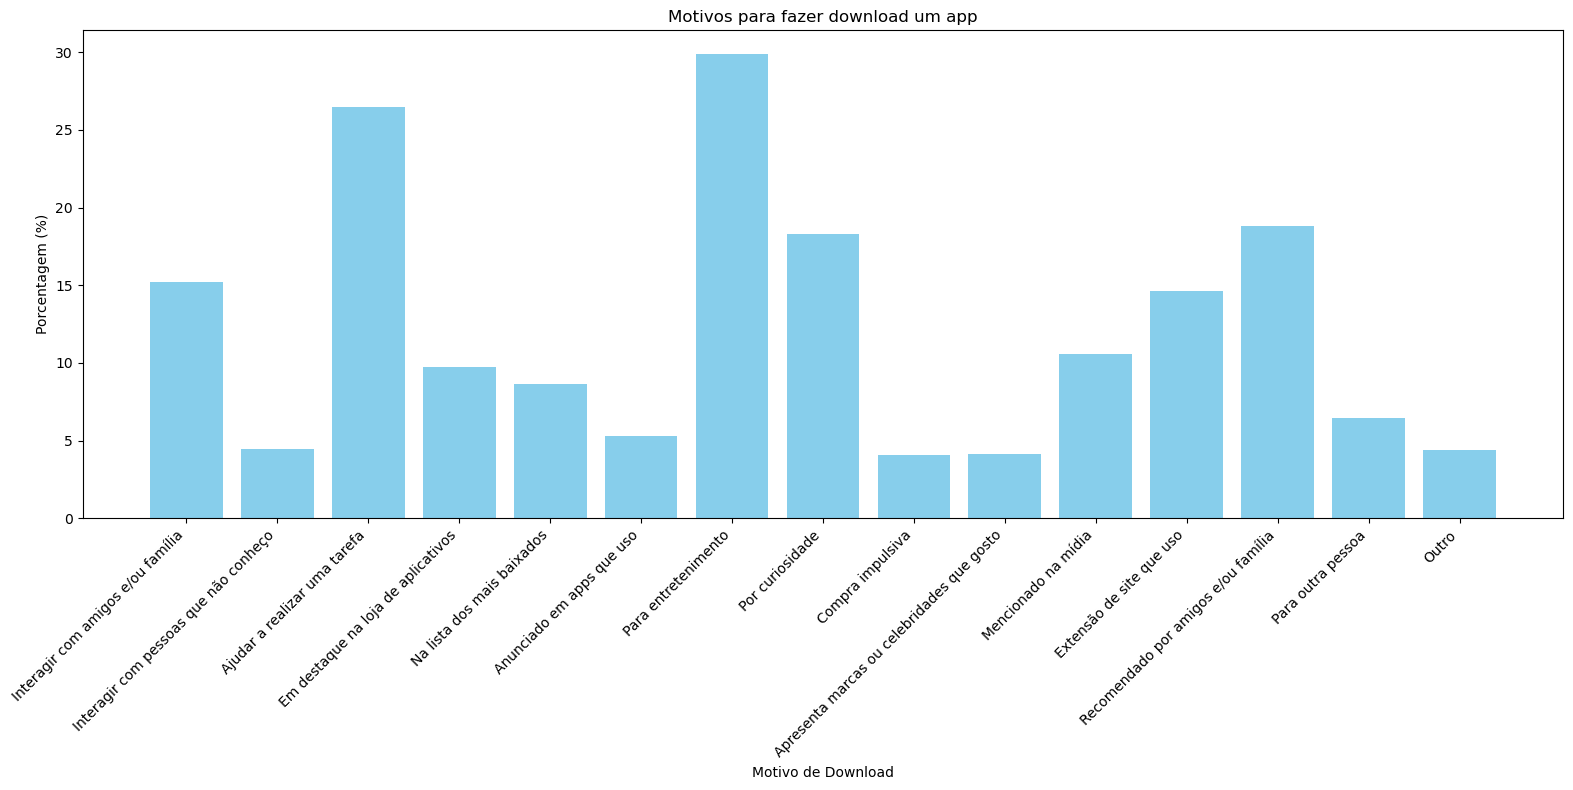

In [46]:
#Gráfico de barras:

'''
rotation=45: Rotaciona os rótulos do eixo em 45 graus.
ha='right': Alinha horizontalmente os rótulos à direita em relação ao ponto de rotação, o que ajuda a evitar a sobreposição.
fontsize=10: Tamanho da fonte dos rótulos do eixo
'''
plt.figure(figsize=(16, 8))
plt.bar(df_porcentagens.index, df_porcentagens['Porcentagem (%)'], color='skyblue')
plt.title('Motivos para fazer download um app')
plt.xlabel('Motivo de Download')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()